### Import the important libraries required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
import pylab

from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import RFE

from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.externals import joblib

import warnings
warnings.filterwarnings('ignore')

C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### Some important functions for the purpose of Exploratory Data Analysis & Feature Engineering

In [2]:
# create heatmap
def heatmap(data):
    plt.figure(figsize=(16,8))
    sns.heatmap(data.corr(),cmap='YlGnBu',linewidth=0.1)

# create histogram
def histplot(data, col):
    plt.figure(figsize=(10,5))
    plt.hist(data[col],bins=50)
    
# create distribution plot
def distplot(data,col):
    plt.figure(figsize=(10,5))
    sns.distplot(data[col],bins=50,fit=norm)

# create barplot
def barplot(data,x,y):
    plt.figure(figsize=(10,5))
    sns.barplot(x=x,y=y,data=data)

# create categor
def catplot(data,x,y):
    sns.catplot(x=x,y=y,data=data,aspect=3)
    
# create a boxplot
def boxplot(data,x,y):
    sns.boxplot(x=x,y=y,data=data)

# create scatter plot
def scatter(data,a,b):
    sns.scatterplot(x=a,y=b,data=data)
    
# create regression plot
def reg(data,a,b):
    sns.regplot(x=a,y=b,data=data)
    
# distribution, probability, box plot in a single plot
def masterplot(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(data[col].dropna(inplace=True))
    
    plt.subplot(1,3,2)
    stats.probplot(data[col],dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=data[col])
    
# logarithmic transformation
def log_master(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(np.log(data[col]))
    
    plt.subplot(1,3,2)
    stats.probplot(np.log(data[col]),dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=np.log(data[col]))
    
# Reciprocal transformation
def reciprocal_master(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(1/data[col])
    
    plt.subplot(1,3,2)
    stats.probplot(1/data[col],dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=1/data[col])
    
# squareroot transformation
def squareroot_master(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(np.sqrt(data[col]))
    
    plt.subplot(1,3,2)
    stats.probplot(np.sqrt(data[col]),dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=np.sqrt(data[col]))
    
# exponential transformation
def exponential_master(data,col,e):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(data[col]**e)
    
    plt.subplot(1,3,2)
    stats.probplot(data[col]**e,dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=data[col]**e)
    
# box-cox transformation
def boxcox_master(data, col):
    plt.figure(figsize=(16, 4))
    plt.tight_layout()

    z,param=stats.boxcox(data[col])
    
    plt.subplot(1, 3, 1)
    sns.distplot(z, bins=30)
    plt.title('Box-Cox Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(z, dist="norm", plot=pylab)
    plt.ylabel('Box-Cox RM quantiles')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=z)
    plt.title('Box-Cox Boxplot')
    
# create 3D plot
def tdplot(data,xs,ys,zs):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(111, projection='3d')
    xs = df['GrLivArea']
    ys = df['SalePrice']
    zs = df['GarageArea']
    ax.scatter(xs, ys, zs,c='#00fff7',edgecolor='black')

    ax.set_xlabel('GrLivArea')
    ax.set_zlabel('GarageArea')
    ax.set_ylabel('SalePrice')
    ax.view_init(elev=0., azim=90)
    
# delete duplicate columns
def duplicates_cols(df):
    cols=df.columns
    col_names=set()
    for i in range(0,len(cols)):
        for j in range(i+1,len(cols)):
            if df[cols[i]].equals(df[cols[j]])==True:
                col_names.add(cols[j])
    return list(col_names)

# mean encoding function that returns groupby aggregate object
def mean_encoding_groupby(dataset,col,use,how):
    group=dataset.groupby(col).agg({use:'mean'}).reset_index()
    s=''
    count=1
    for c in col:
        if len(col)==1:
            s=c
        else:
            if count==1:
                s=s+c
            else:
                s=s+"-"+c
        count=count+1
    group.rename(columns={use:s+'_encoded'},inplace=True)
    group.to_pickle(s+'_encoded.pkl')
    return group

# mean encoding function that returns changes in training dataset
def mean_encoding_train(dataset,col,use,how):
    group=dataset.groupby(col).agg({use:'mean'}).reset_index()
    s=''
    count=1
    for c in col:
        if len(col)==1:
            s=c
        else:
            if count==1:
                s=s+c
            else:
                s=s+"-"+c
        count=count+1
    group.rename(columns={use:s+'_encoded'},inplace=True)
    group.to_pickle(s+'_encoded.pkl')
    return pd.merge(dataset,group,how=how,on=col)

# mean encoding function that returns changes in both datasets training and testing
def mean_encoding_train_test(dataset1,dataset2,col,use,how):
    group=dataset1.groupby(col).agg({use:'mean'}).reset_index()
    s=''
    count=1
    for c in col:
        if len(col)==1:
            s=c
        else:
            if count==1:
                s=s+c
            else:
                s=s+"-"+c
        count=count+1
    group.rename(columns={use:s+'_encoded'},inplace=True)
    group.to_pickle(s+'_encoded.pkl')
    return pd.merge(dataset1,group,how=how,on=col),pd.merge(dataset2,group,how=how,on=col)

# predict column values by ML model and fill NaN
def set_val_model_pred(data,pred,col):
    # data is the main dataframe where null is there
    # pred are the preicted values by the model
    # col is the column for which Nan was there and it's output was predicted
    pred=pred.reshape(1,-1)[0]
    setdata=df.loc[df[col].isnull(),col]
    setdata[col]=pred
    data.loc[data[col].isnull(),col]=setdata[col]
    
# get columns and their correlated columns in a list structured in a database
def column_corr(data,value):
    correlation=data.corr()
    correlation[(correlation<value) & (correlation>-value)]=np.nan
    np.fill_diagonal(correlation.values, np.nan)
    related=pd.DataFrame(columns=['Column Name','Related Columns'])
    c=0
    for row in correlation.index:
        ls=[]
        for col in correlation.columns:
            if (correlation.loc[row,col]>=value) | (correlation.loc[row,col]<=-value):
                ls.append(col)
        if len(ls)==0:
            continue
        else:
            related.loc[c,'Column Name']=row
            related.loc[c,'Related Columns']=ls
            c=c+1
    return related

# get correlation of a column with certain columns in a dataframe
def get_col_corr(data,col,lscol):
    corr=pd.DataFrame(columns=['Corr With','Corr Value'])
    for i in range(0,len(lscol)):
        corr.loc[i,'Corr With']=lscol[i]
        corr.loc[i,'Corr Value']=df[col].corr(df[lscol[i]])
    return corr

# returns unique values in any column of the dataset
def get_unique(data,col):
    print(col)
    print(data[col].unique())
    print('\n')
    
# returns number of unique values in any column of the dataset
def get_nunique(data,col):
    print(col)
    print(data[col].nunique())
    print('\n')
    
# returns unique values counts in any column of the dataset
def get_valuecounts(data,col):
    print(col)
    print(data[col].value_counts())
    print('\n')
    
# function to create classes out of continuous data
def numerical_to_categorical(data,col,bins):
    ma=data[col].max()
    mi=data[col].min()
    diff=ma-mi
    ran=diff/bins
    inter=pd.DataFrame(columns=['lb','ub'])
    for i in range(1,bins+1):
        if i==1:
            inter.loc[i,'lb']=mi
            inter.loc[i,'ub']=mi+ran
        if i!=1:
            inter.loc[i,'lb']=inter.loc[i-1,'ub']
            inter.loc[i,'ub']=inter.loc[i,'lb']+ran
    inter.to_pickle(col+'_bin.pkl')
    data[col+'_cat']=np.nan
    for i in range(1,len(inter.index)+1):
        if (i==1):
            data.loc[(data[col]>=inter.loc[i,'lb']) & (data[col]<=inter.loc[i,'ub']),col+'_cat']=i
        else:
            data.loc[(data[col]>inter.loc[i,'lb']) & (data[col]<=inter.loc[i,'ub']),col+'_cat']=i
            
    return data

def num_to_cat(data,col,inter):
    data[col+'_cat']=np.nan
    for i in range(1,len(inter.index)+1):
        if (i==1):
            data.loc[(data[col]>=inter.loc[i,'lb']) & (data[col]<=inter.loc[i,'ub']),col+'_cat']=i
        else:
            data.loc[(data[col]>inter.loc[i,'lb']) & (data[col]<=inter.loc[i,'ub']),col+'_cat']=i
    if (data[col+'_cat'].isnull().sum()>0):
        data.loc[data[col+'_cat'].isnull(),col+'_cat']=i+1
    return data

# remove constant columns
def rem_const_cols(data):
    cols=[]
    for col in data.columns:
        if data[col].nunique()==1:
            cols.append(col)
    return cols

# remove completely null columns
def rem_comp_null_cols(data):
    null_cols=[]
    for col in data.columns:
        if data[col].isnull().sum()==len(data.index):
            null_cols.append(col)
    data.drop(null_cols,axis=1,inplace=True)
    return data

# check feature importances
def check_feature_importance(fi):
    plt.figure(figsize=(16,8))
    print(fi.plot(kind='barh'))

## Importing the dataset

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
df=pd.read_csv('adult.csv')
df1=df.copy()

### Meaning of the columns

* age - Age of the person
* workclass - Sector in which a person works
* fnlwgt - No of people this entry represents ie frequency of people having similar trend or data
* education - Highest degree of education attained
* educational-num - education column converted to numerically discrete column
* marital-status - Status of marriage
* occupation - Work done by the person
* relationship - Relationship with family
* race - Race of the person
* gender - Gender of the person
* capital-gain - Gain in capital
* capital-loss - Loss in capital
* hours-per-week - Working hours per week
* native-country - Country from which the person belongs to
* income - Income is greater than 50K or less than or equal to 50K

### Generating the output label as

* 0 - <=50K
* 1 - >50K

In [5]:
df['label']=np.where(df['income'].isin(['<=50K']),0,1)

## Exploratory Data Analysis

In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0


In [7]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,label
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
 15  label            48842 non-null  int32 
dtypes: int32(1), int64(6), object(9)
memory usage: 5.8+ MB


In [9]:
df.shape

(48842, 16)

In [10]:
df['label'].value_counts()

0    37155
1    11687
Name: label, dtype: int64

In [11]:
print('Class 0 (<=50K) - '+str(np.floor(df['label'].value_counts()[0]/len(df)*100))+'%')
print('Class 1 (>50K) - '+str(np.ceil(df['label'].value_counts()[1]/len(df)*100))+'%')

Class 0 (<=50K) - 76.0%
Class 1 (>50K) - 24.0%


### Removing constant columns & duplicate columns

In [12]:
rem_const_cols(df)

[]

In [13]:
duplicates_cols(df)

[]

### It can be seen clearly that there were neither any constant columns or any duplicate columns as the list of such columns seems to be empty.

* These are feature selection processes which are basically filter methods used for filtering the data. These may include variance based selection, covariance based selection, correlation based selection, and much more.

* Constant columns are those columns that have zero variance and do not help models capture patterns from the data provided.

### Dividing entire dataset into Training, Validation & Testing

In [14]:
train=df.loc[0:29305]
val=df.loc[29306:39073]
test=df.loc[39074:48841]

In [15]:
print('Train Set - First 60% of entire dataset')
print('Train Shape - '+str(train.shape))
print('Class 0 (<=50K) - '+str(np.floor(train['label'].value_counts()[0]/len(train)*100))+'%')
print('Class 1 (>50K) - '+str(np.ceil(train['label'].value_counts()[1]/len(train)*100))+'%')
print('\n')
print('Validation Set - Next 20% of entire dataset')
print('Validation Shape - '+str(val.shape))
print('Class 0 (<=50K) - '+str(np.floor(val['label'].value_counts()[0]/len(val)*100))+'%')
print('Class 1 (>50K) - '+str(np.ceil(val['label'].value_counts()[1]/len(val)*100))+'%')
print('\n')
print('Test Set - Next 20% of entire dataset')
print('Test Shape - '+str(test.shape))
print('Class 0 (<=50K) - '+str(np.floor(test['label'].value_counts()[0]/len(test)*100))+'%')
print('Class 1 (>50K) - '+str(np.ceil(test['label'].value_counts()[1]/len(test)*100))+'%')

Train Set - First 60% of entire dataset
Train Shape - (29306, 16)
Class 0 (<=50K) - 76.0%
Class 1 (>50K) - 24.0%


Validation Set - Next 20% of entire dataset
Validation Shape - (9768, 16)
Class 0 (<=50K) - 76.0%
Class 1 (>50K) - 24.0%


Test Set - Next 20% of entire dataset
Test Shape - (9768, 16)
Class 0 (<=50K) - 75.0%
Class 1 (>50K) - 25.0%


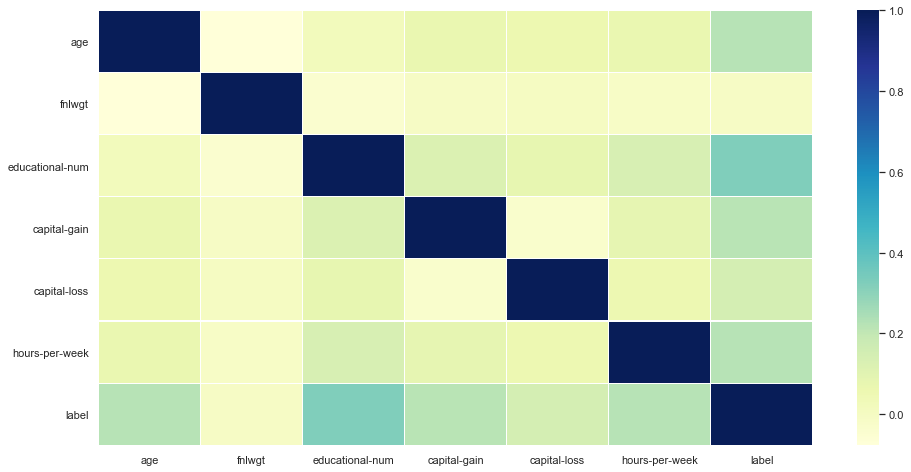

In [16]:
# checking out correlation
heatmap(train)

### It can be seen from the heatmap that educational-num has the best correlation with label i.e output label ranging around 0.3-0.4 in terms of pearson's correlation value.

In [17]:
# age & fnlwgt
age_wgt=train.groupby(['age'])['fnlwgt'].agg(['sum']).reset_index()

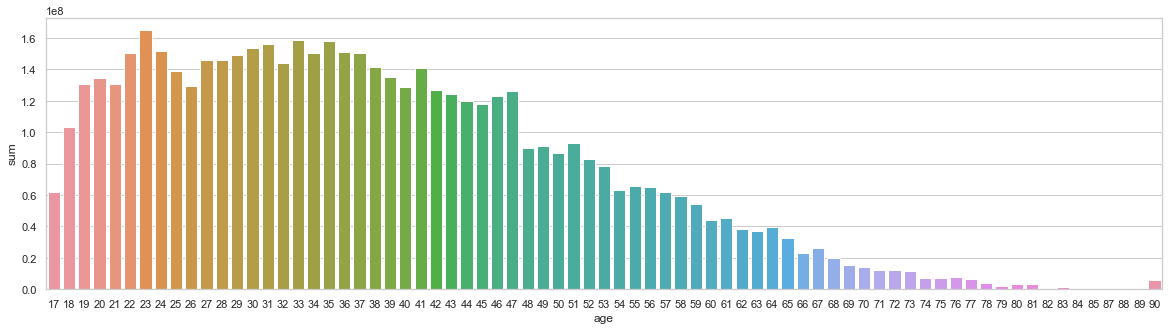

In [18]:
plt.figure(figsize=(20,5))
sns.barplot(x=age_wgt['age'],y=age_wgt['sum'])

In [19]:
age_wgt_hue=train.groupby(['age','label'])['fnlwgt'].agg(['sum']).reset_index()

In [20]:
age_wgt_label_count=age_wgt_hue.groupby(['label'])['sum'].agg(['sum']).reset_index()

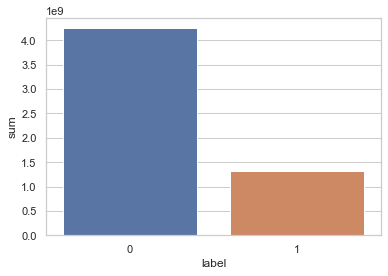

In [21]:
sns.barplot(age_wgt_label_count['label'],age_wgt_label_count['sum'])

### Insights

* As it is known that for various ages fnlwgt is the frequency representing the line i.e how many times the same record appeared in the dataset, hence summing up all the frequencies for all the ages, which shows up to be skewed towards right, i.e maximum of the working population is seen in range 20-30 and gradually the trend decreases as age increases.

In [22]:
# workclass
workclass=train.groupby(['workclass'])['label'].agg(['count','sum']).reset_index()
workclass['workclass_label_ratio']=workclass['sum']/workclass['count']*100

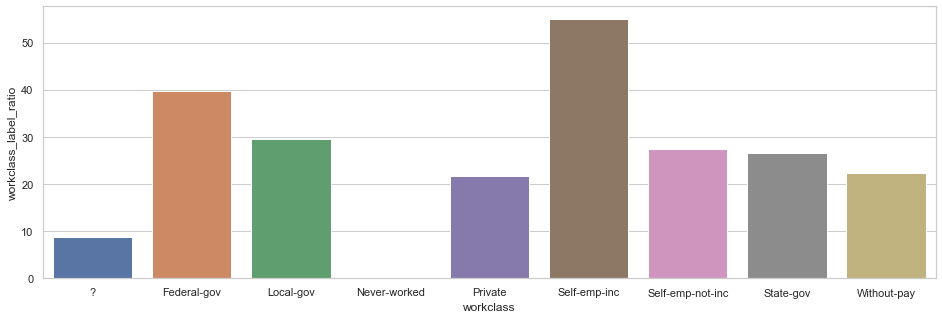

In [23]:
plt.figure(figsize=(16,5))
sns.barplot(workclass['workclass'],workclass['workclass_label_ratio'])

### Insights

* It can be clearly seen from the above graph that the maximum probability of having a higher income i.e >50K (here) is for Self-emp-inc.

* Further, the next workclass employees having a higher ratio or probability of class 1 i.e >50K annual income are Federal Government, Local government and State Government employees, which gives an insight that usually the governmental employees have a higher chance of having a higher income. Also, they might get special services depending on posts like electricity bill pays or phone recharge and free quarters for living which helps them save more and have a higher income.

* Private workclass and without pay workclass are almost at similar probability or ratio. Only around 20% of the total working class make it to a higher income.

In [24]:
# workclass & education
work_edu=train.groupby(['workclass','education'])['label'].agg(['count','sum']).reset_index()
work_edu['work_edu_ratio']=work_edu['sum']/work_edu['count']*100

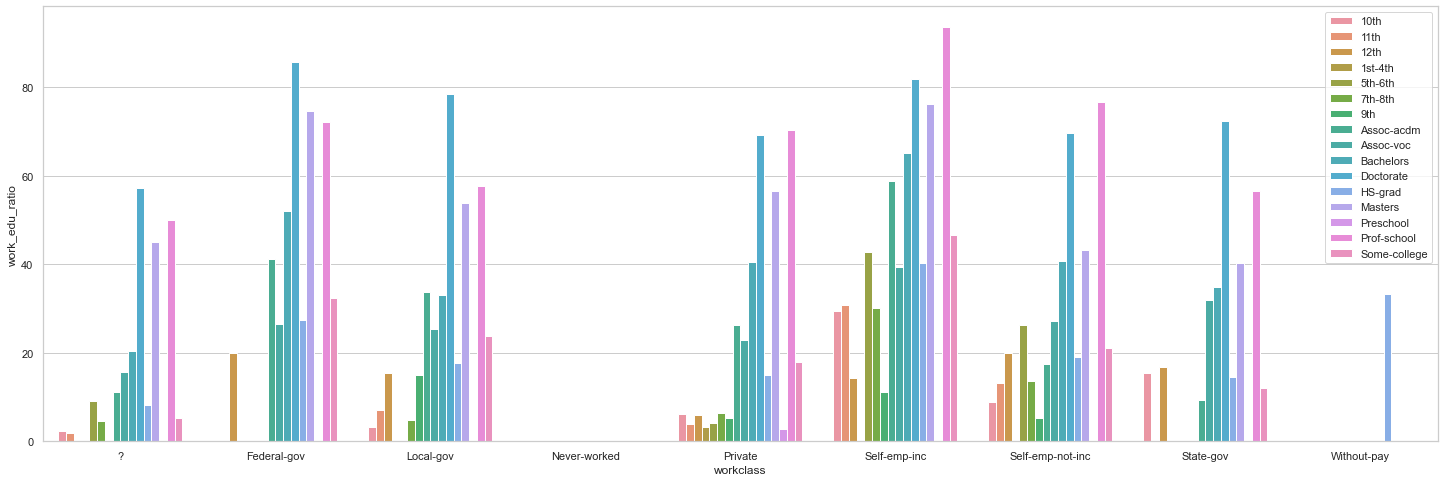

In [25]:
plt.figure(figsize=(25,8))
sns.barplot(work_edu['workclass'],work_edu['work_edu_ratio'],hue=work_edu['education'])
plt.legend(loc='upper right')

### Insights

* It can be seen from here that usually Self-emp-inc working people have been to some college, have either done a doctorate or bachelors, or HS-grad and much more but similarly the number of lesser studied people is also high for this strata only.
* Similarly, the people without pay have only studied till HS-grad.
* Another similar trend is that mostly all the people who are working for them, the majority have atleast done Bachelors. 

In [26]:
# workclass and occupation
work_occu=train.groupby(['workclass','occupation'])['label'].agg(['count','sum']).reset_index()
work_occu['work_occu_ratio']=work_occu['sum']/work_occu['count']*100

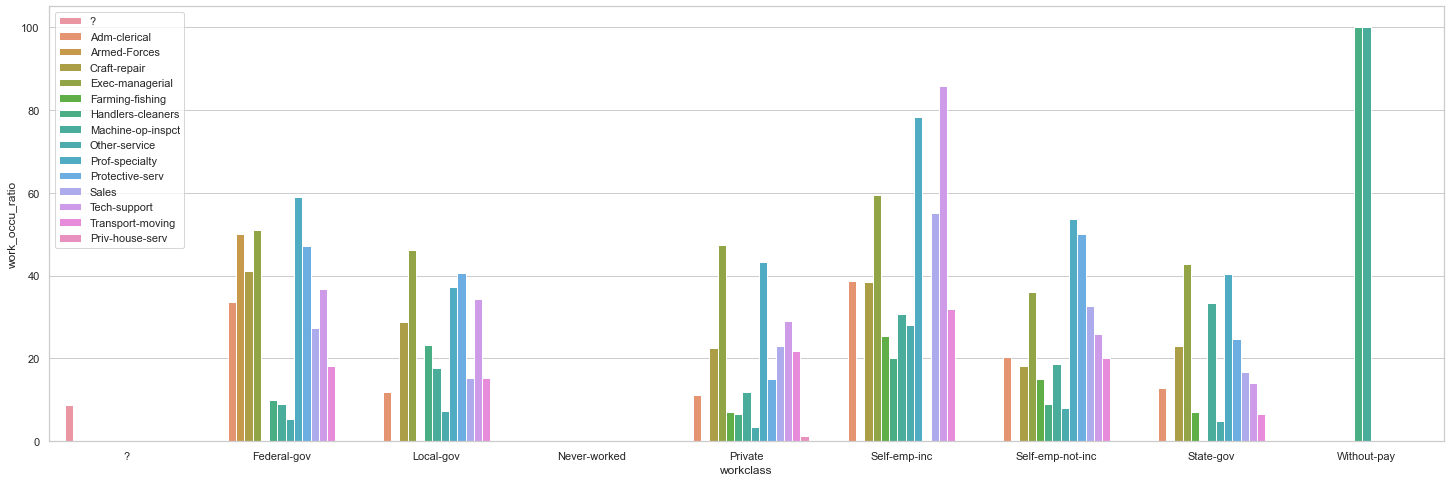

In [27]:
plt.figure(figsize=(25,8))
sns.barplot(work_occu['workclass'],work_occu['work_occu_ratio'],hue=work_occu['occupation'])
plt.legend(loc='upper left')

### Insights

* It can be seen that usually people without-pay and who have an annual income >50K are likely to be Cleaners or Machine Operators
* Also, it is seen that mostly people in Self-emp-inc, Self-emp-non-inc, Federal-gov, Local-gov State-gov are likely to have occupations like Adm-Clerical, Craft-repair, Exec-management, Farming-fishing, Prof-specialty and mmuch more.

In [28]:
# education
edu=train.groupby(['education'])['label'].agg(['count','sum']).reset_index()
edu['education_ratio']=edu['sum']/edu['count']*100

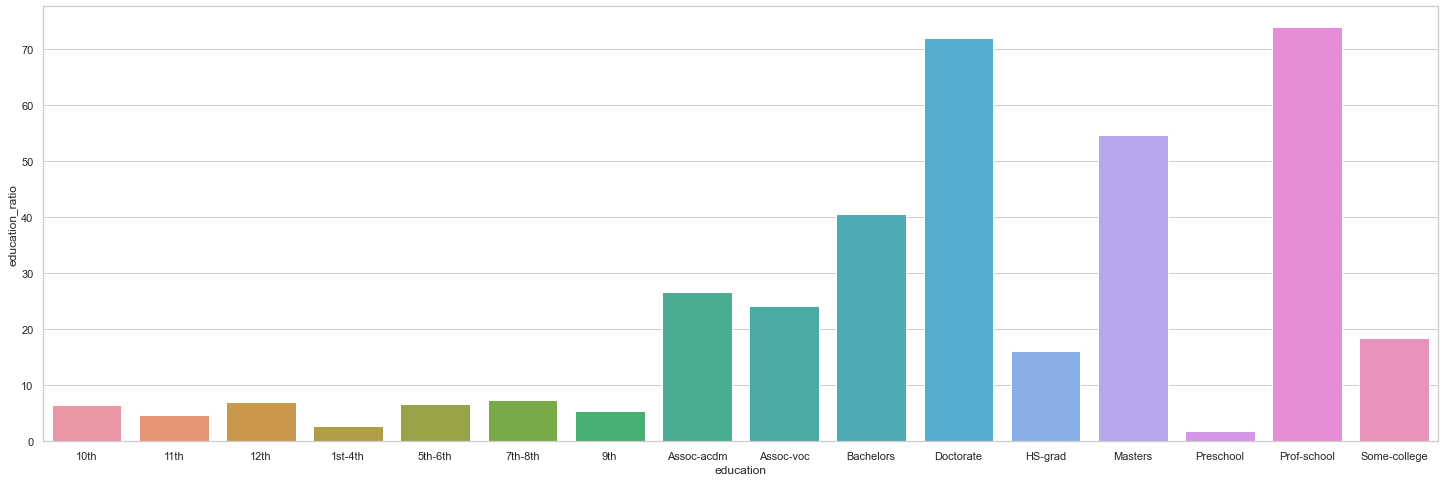

In [29]:
plt.figure(figsize=(25,8))
sns.barplot(edu['education'],edu['education_ratio'])

In [30]:
# marital_status
ms=train.groupby(['marital-status'])['label'].agg(['count','sum']).reset_index()
ms['marital_status_ratio']=ms['sum']/ms['count']*100

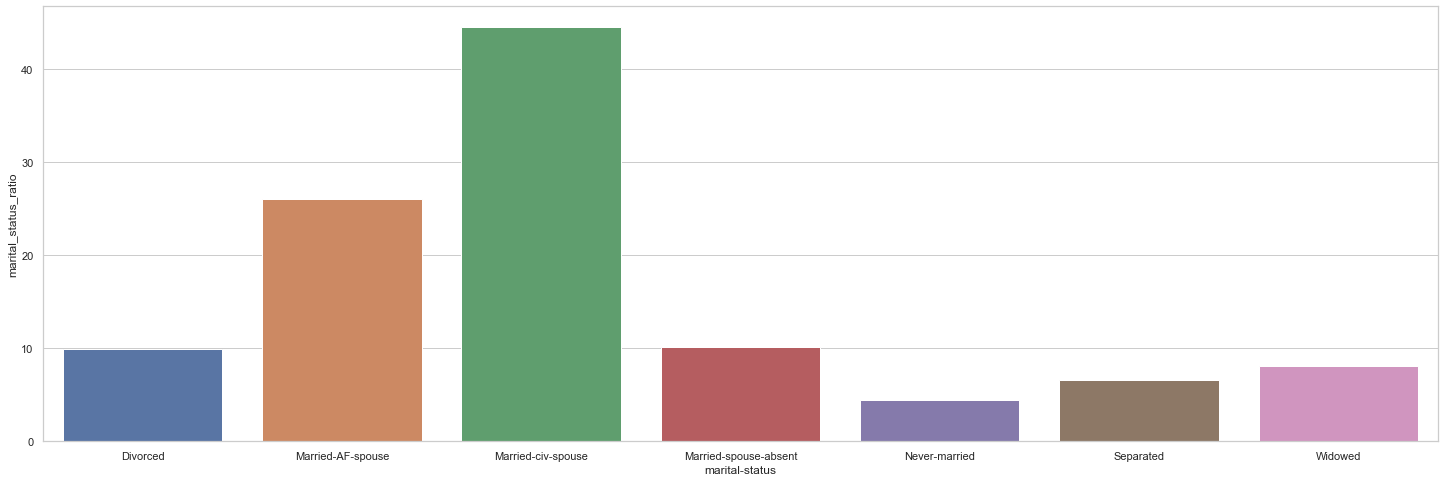

In [31]:
plt.figure(figsize=(25,8))
sns.barplot(ms['marital-status'],ms['marital_status_ratio'])

In [32]:
# occupation
occu=train.groupby(['occupation'])['label'].agg(['count','sum']).reset_index()
occu['occupation_ratio']=occu['sum']/occu['count']*100

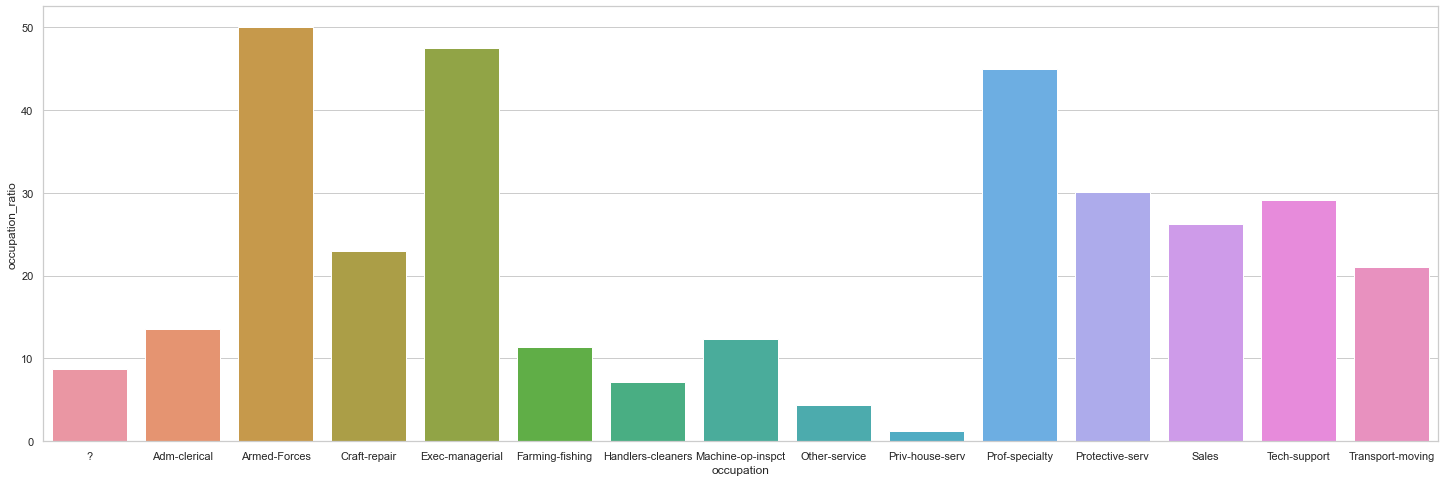

In [33]:
plt.figure(figsize=(25,8))
sns.barplot(occu['occupation'],occu['occupation_ratio'])

### Doing some EDA on continuous variables

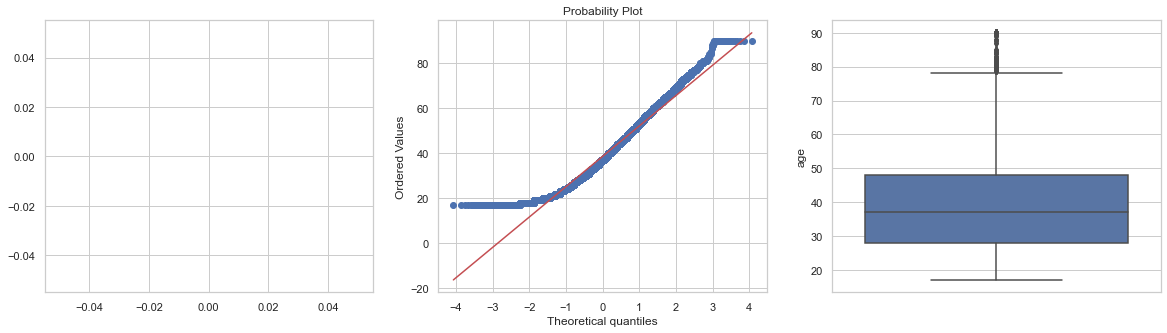

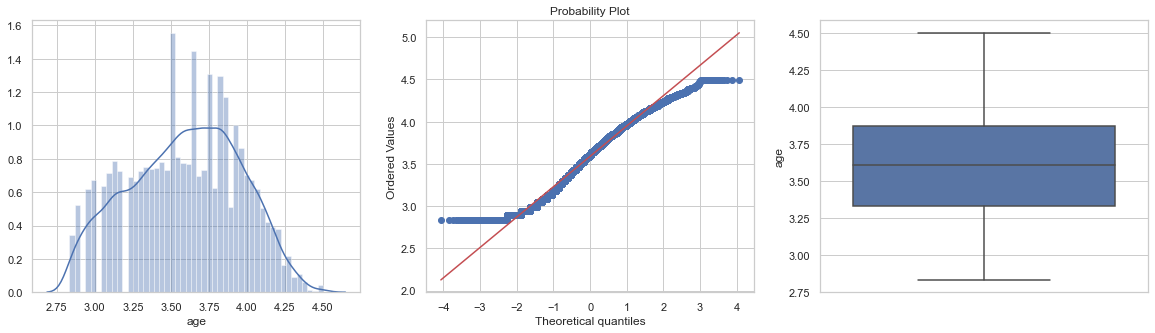

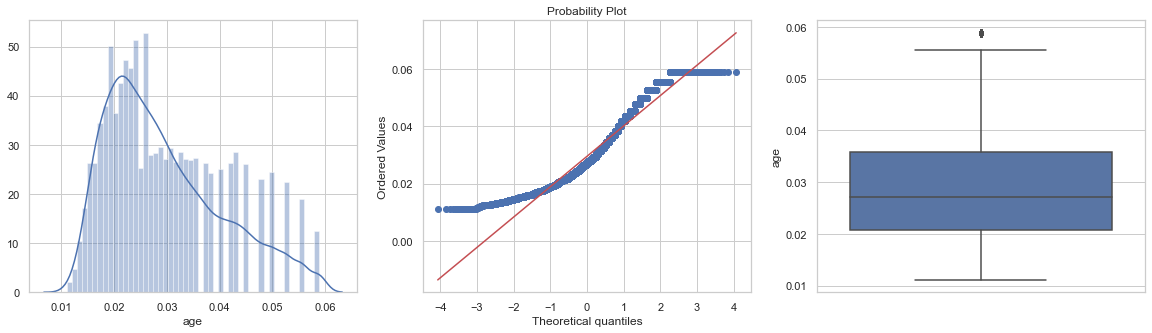

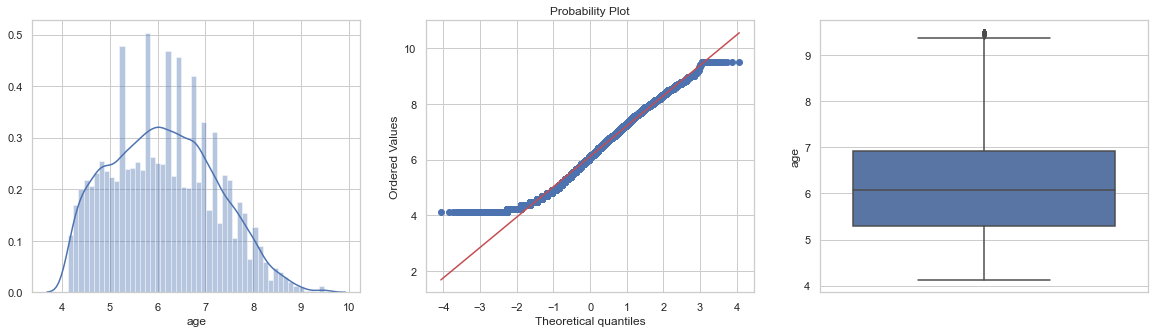

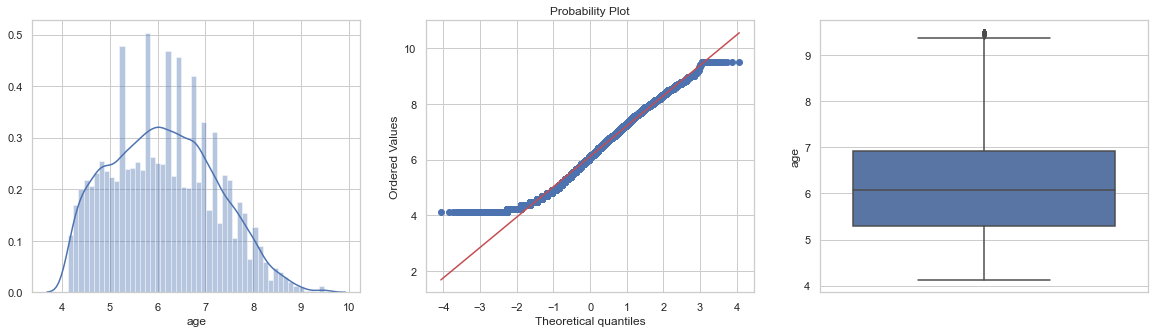

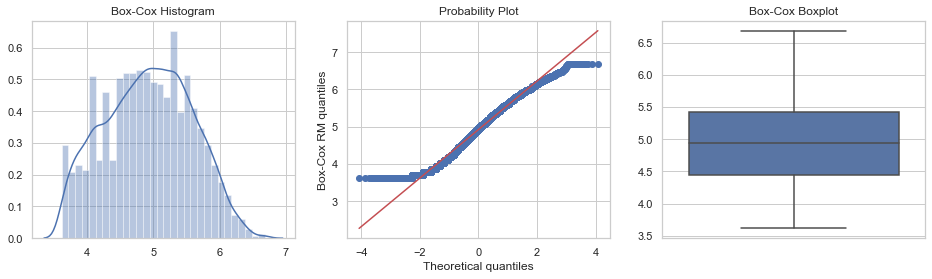

In [34]:
masterplot(train,'age')
log_master(train,'age')
reciprocal_master(train,'age')
squareroot_master(train,'age')
exponential_master(train,'age',0.5)
boxcox_master(train,'age')

### It can be seen from the above plots that BoxCox plot gives the best transformation such that there exist no outliers in the data.

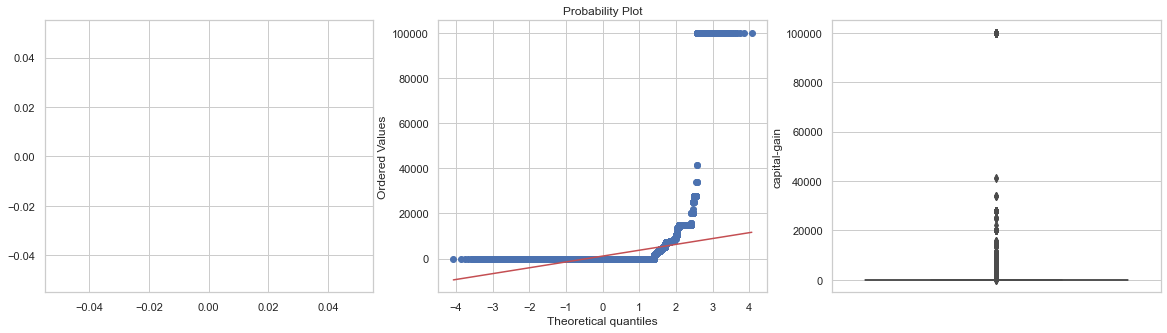

In [35]:
masterplot(train,'capital-gain')

### It can be viewed from the above graph that it's of no use in transforming this variable as mostly it is 0 centric or a constant value centric and does not have much of variance

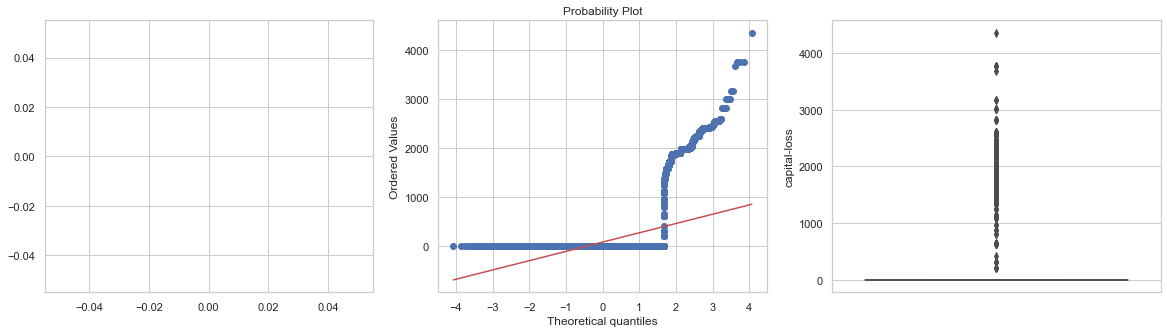

In [36]:
masterplot(train,'capital-loss')

### Similarly in this it can be viewed from the above graph that it's of no use in transforming this variable as mostly it is 0 centric or a constant value centric and does not have much of variance

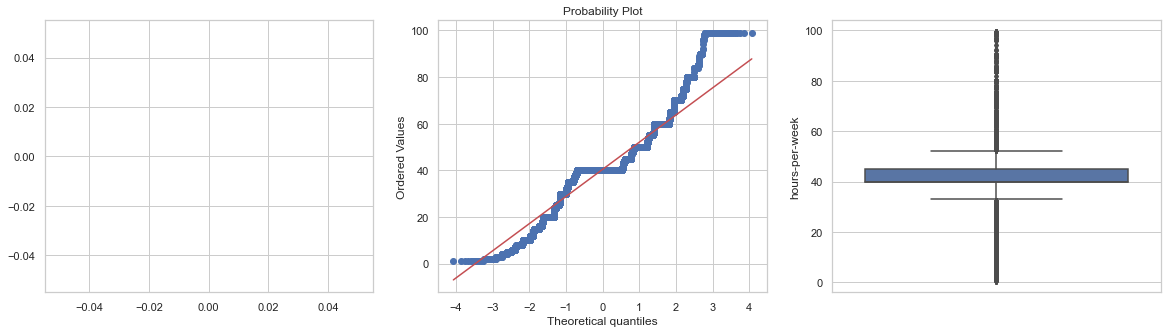

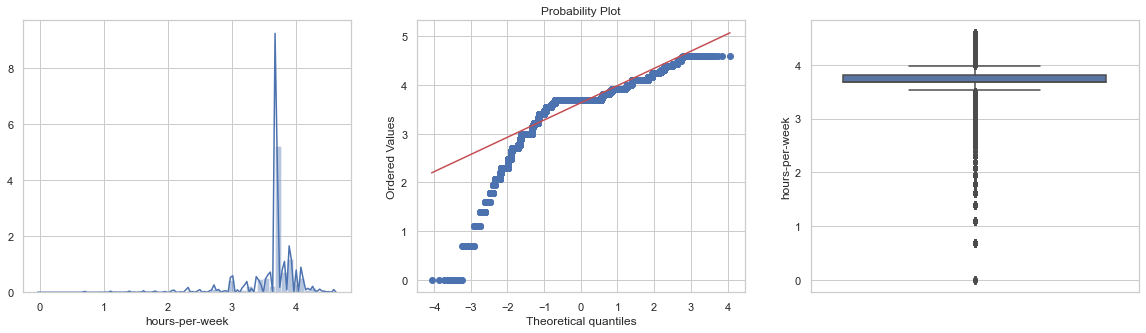

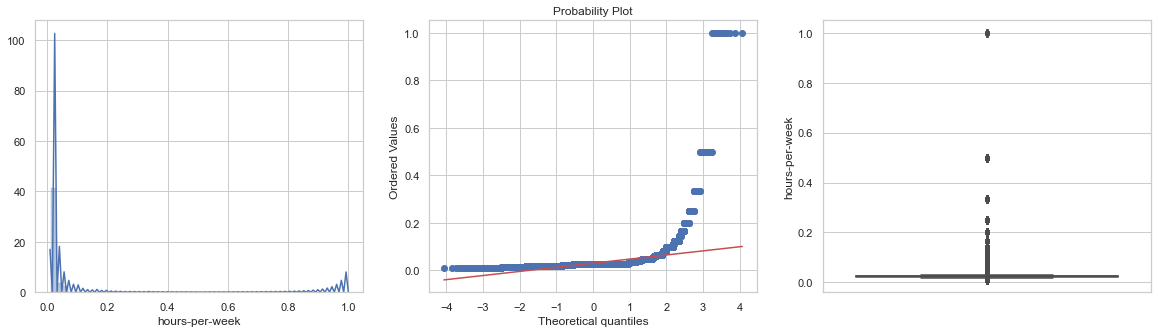

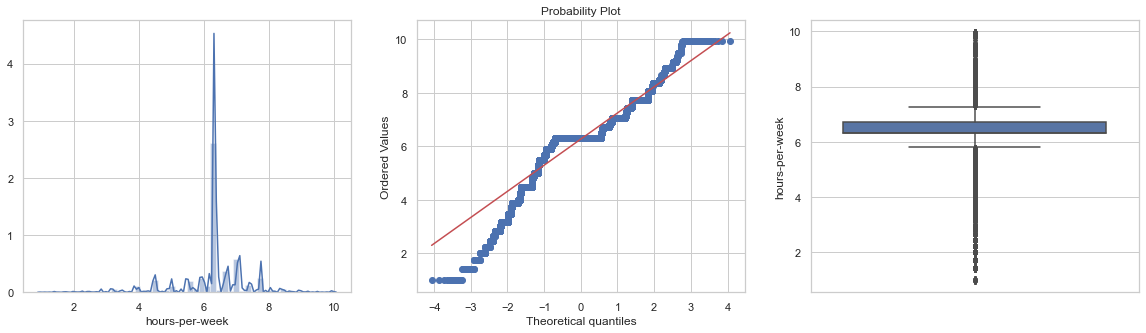

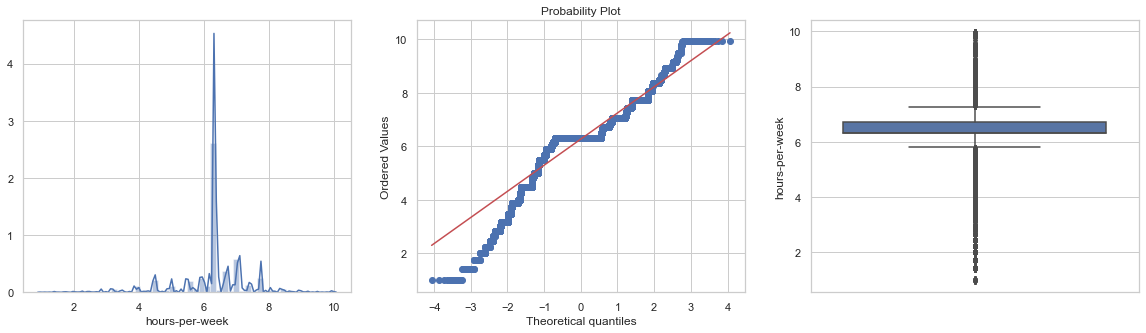

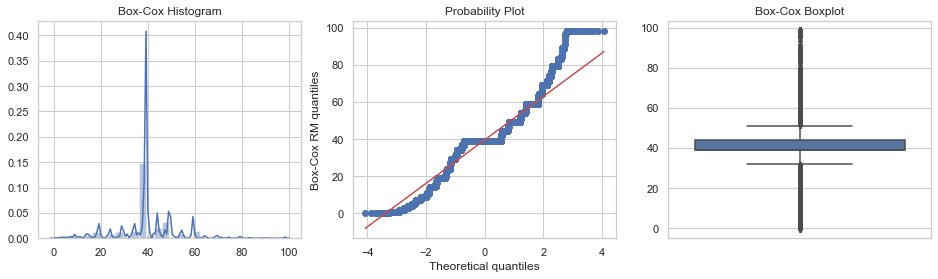

In [37]:
masterplot(train,'hours-per-week')
log_master(train,'hours-per-week')
reciprocal_master(train,'hours-per-week')
squareroot_master(train,'hours-per-week')
exponential_master(train,'hours-per-week',0.5)
boxcox_master(train,'hours-per-week')

### Also, in this case it is of no use in transforming this variable as it seems to be that there are spikes at particular working hours as it might depend from working zones and work of the person

## Feature Engineering

### Workclass Ratio

In [38]:
work=train.groupby(['workclass'])['label'].agg(['count','sum']).reset_index()
work['workclass_ratio']=work['sum']/work['count']

In [39]:
train=train.merge(work[['workclass','workclass_ratio']],on='workclass',how='left')
val=val.merge(work[['workclass','workclass_ratio']],on='workclass',how='left')
test=test.merge(work[['workclass','workclass_ratio']],on='workclass',how='left')

### Marital Status Ratio

In [40]:
marital=train.groupby(['marital-status'])['label'].agg(['count','sum']).reset_index()
marital['marital_status_ratio']=marital['sum']/marital['count']

In [41]:
train=train.merge(marital[['marital-status','marital_status_ratio']],on='marital-status',how='left')
val=val.merge(marital[['marital-status','marital_status_ratio']],on='marital-status',how='left')
test=test.merge(marital[['marital-status','marital_status_ratio']],on='marital-status',how='left')

### Occupation Ratio

In [42]:
occupation=train.groupby(['occupation'])['label'].agg(['count','sum']).reset_index()
occupation['occupation_ratio']=occupation['sum']/occupation['count']

In [43]:
train=train.merge(occupation[['occupation','occupation_ratio']],on='occupation',how='left')
val=val.merge(occupation[['occupation','occupation_ratio']],on='occupation',how='left')
test=test.merge(occupation[['occupation','occupation_ratio']],on='occupation',how='left')

### Relationship Ratio

In [44]:
relationship=train.groupby(['relationship'])['label'].agg(['count','sum']).reset_index()
relationship['relationship_ratio']=relationship['sum']/relationship['count']

In [45]:
train=train.merge(relationship[['relationship','relationship_ratio']],on='relationship',how='left')
val=val.merge(relationship[['relationship','relationship_ratio']],on='relationship',how='left')
test=test.merge(relationship[['relationship','relationship_ratio']],on='relationship',how='left')

### Race Ratio

In [46]:
race=train.groupby(['race'])['label'].agg(['count','sum']).reset_index()
race['race_ratio']=race['sum']/race['count']

In [47]:
train=train.merge(race[['race','race_ratio']],on='race',how='left')
val=val.merge(race[['race','race_ratio']],on='race',how='left')
test=test.merge(race[['race','race_ratio']],on='race',how='left')

### Gender Ratio

In [48]:
gender=train.groupby(['gender'])['label'].agg(['count','sum']).reset_index()
gender['gender_ratio']=gender['sum']/gender['count']

In [49]:
train=train.merge(gender[['gender','gender_ratio']],on='gender',how='left')
val=val.merge(gender[['gender','gender_ratio']],on='gender',how='left')
test=test.merge(gender[['gender','gender_ratio']],on='gender',how='left')

### Native Country Ratio

In [50]:
native=train.groupby(['native-country'])['label'].agg(['count','sum']).reset_index()
native['native_country_ratio']=native['sum']/native['count']

In [51]:
train=train.merge(native[['native-country','native_country_ratio']],on='native-country',how='left')
val=val.merge(native[['native-country','native_country_ratio']],on='native-country',how='left')
test=test.merge(native[['native-country','native_country_ratio']],on='native-country',how='left')

### Age BoxCox

In [52]:
x,train['age_boxcox']=stats.boxcox(train['age'])
y,val['age_boxcox']=stats.boxcox(val['age'])
z,test['age_boxcox']=stats.boxcox(test['age'])

### Educational Num Ratio

In [53]:
edu=train.groupby(['educational-num'])['label'].agg(['count','sum']).reset_index()
edu['educational_num_ratio']=edu['sum']/edu['count']

In [54]:
train=train.merge(edu[['educational-num','educational_num_ratio']],on='educational-num',how='left')
val=val.merge(edu[['educational-num','educational_num_ratio']],on='educational-num',how='left')
test=test.merge(edu[['educational-num','educational_num_ratio']],on='educational-num',how='left')

### Filling nulls for ratio based features

In [55]:
val['native_country_ratio'].fillna(value=val['native_country_ratio'].mode()[0],axis=0,inplace=True)

## Modelling & Feature Selection

In [56]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'label', 'workclass_ratio', 'marital_status_ratio',
       'occupation_ratio', 'relationship_ratio', 'race_ratio', 'gender_ratio',
       'native_country_ratio', 'age_boxcox', 'educational_num_ratio'],
      dtype='object')

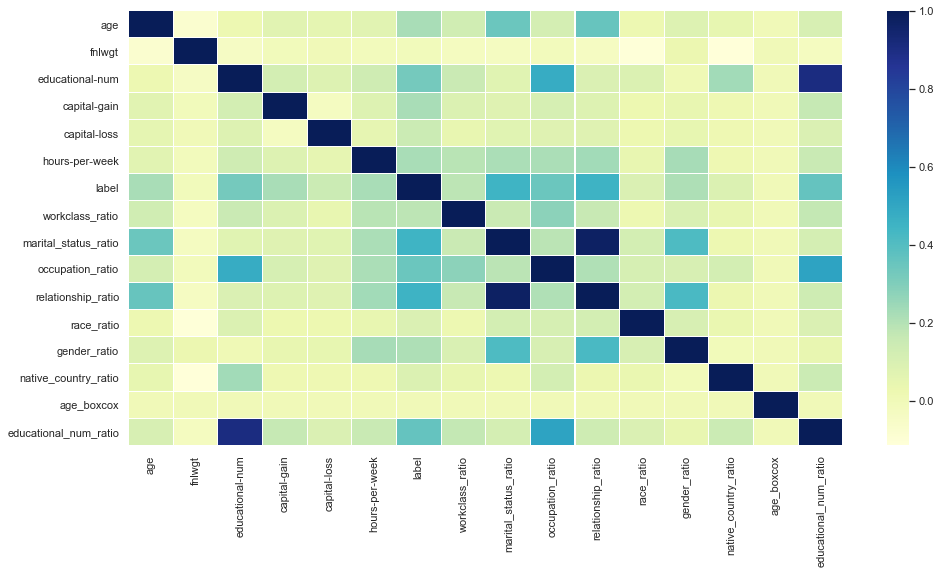

In [57]:
heatmap(train)

In [58]:
feat=['age',
      #'educational-num',
      'capital-gain',
      #'capital-loss',
      'hours-per-week',
      'workclass_ratio',
      'marital_status_ratio',
      'occupation_ratio',
      #'relationship_ratio', 
      #'race_ratio',
      'gender_ratio',
      'native_country_ratio',
      #'age_boxcox',
      'educational_num_ratio'
      ]

### RandomForestClassifer

In [59]:
rfc=RandomForestClassifier(max_depth=4,class_weight='balanced')
rfc.fit(train[feat],train['label'])
pred_val= rfc.predict(val[feat])
pred_test= rfc.predict(test[feat])
print('Validation Metrics')
print(confusion_matrix(val['label'],pred_val))
print(classification_report(val['label'],pred_val))
print('Test Metrics')
print(confusion_matrix(test['label'],pred_test))
print(classification_report(test['label'],pred_test))

Validation Metrics
[[5511 1934]
 [ 276 2047]]
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      7445
           1       0.51      0.88      0.65      2323

    accuracy                           0.77      9768
   macro avg       0.73      0.81      0.74      9768
weighted avg       0.85      0.77      0.79      9768

Test Metrics
[[5478 1886]
 [ 280 2124]]
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      7364
           1       0.53      0.88      0.66      2404

    accuracy                           0.78      9768
   macro avg       0.74      0.81      0.75      9768
weighted avg       0.85      0.78      0.79      9768



AxesSubplot(0.125,0.125;0.775x0.755)


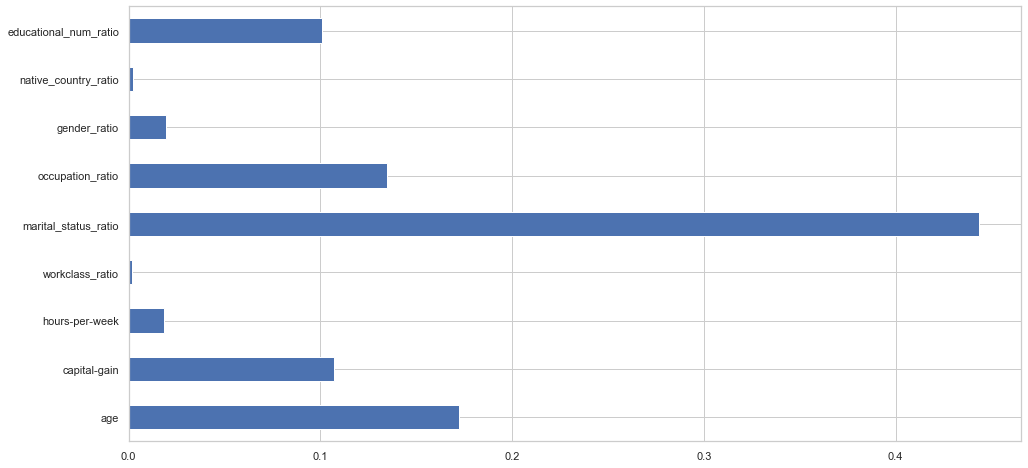

In [60]:
check_feature_importance(pd.Series(rfc.feature_importances_,index=feat))

### AdaBoostClassifier (Class Weight hyperparameter not available)

In [61]:
ada=AdaBoostClassifier()
ada.fit(train[feat],train['label'])
pred_val= ada.predict(val[feat])
pred_test= ada.predict(test[feat])
print('Validation Metrics')
print(confusion_matrix(val['label'],pred_val))
print(classification_report(val['label'],pred_val))
print('Test Metrics')
print(confusion_matrix(test['label'],pred_test))
print(classification_report(test['label'],pred_test))

Validation Metrics
[[7012  433]
 [ 989 1334]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7445
           1       0.75      0.57      0.65      2323

    accuracy                           0.85      9768
   macro avg       0.82      0.76      0.78      9768
weighted avg       0.85      0.85      0.85      9768

Test Metrics
[[6929  435]
 [ 959 1445]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7364
           1       0.77      0.60      0.67      2404

    accuracy                           0.86      9768
   macro avg       0.82      0.77      0.79      9768
weighted avg       0.85      0.86      0.85      9768



### GradientBoostingClassifier

In [62]:
gbc=GradientBoostingClassifier(max_depth=4)
gbc.fit(train[feat],train['label'])
pred_val= gbc.predict(val[feat])
pred_test= gbc.predict(test[feat])
print('Validation Metrics')
print(confusion_matrix(val['label'],pred_val))
print(classification_report(val['label'],pred_val))
print('Test Metrics')
print(confusion_matrix(test['label'],pred_test))
print(classification_report(test['label'],pred_test))

Validation Metrics
[[7002  443]
 [ 893 1430]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7445
           1       0.76      0.62      0.68      2323

    accuracy                           0.86      9768
   macro avg       0.83      0.78      0.80      9768
weighted avg       0.86      0.86      0.86      9768

Test Metrics
[[6933  431]
 [ 881 1523]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7364
           1       0.78      0.63      0.70      2404

    accuracy                           0.87      9768
   macro avg       0.83      0.79      0.81      9768
weighted avg       0.86      0.87      0.86      9768



### XGBoostClassifier

In [63]:
xgb=XGBClassifier()
xgb.fit(train[feat],train['label'])
pred_val= xgb.predict(val[feat])
pred_test= xgb.predict(test[feat])
print('Validation Metrics')
print(confusion_matrix(val['label'],pred_val))
print(classification_report(val['label'],pred_val))
print('Test Metrics')
print(confusion_matrix(test['label'],pred_test))
print(classification_report(test['label'],pred_test))

Validation Metrics
[[6971  474]
 [ 866 1457]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7445
           1       0.75      0.63      0.69      2323

    accuracy                           0.86      9768
   macro avg       0.82      0.78      0.80      9768
weighted avg       0.86      0.86      0.86      9768

Test Metrics
[[6899  465]
 [ 856 1548]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7364
           1       0.77      0.64      0.70      2404

    accuracy                           0.86      9768
   macro avg       0.83      0.79      0.81      9768
weighted avg       0.86      0.86      0.86      9768



### Logistic Regression

In [64]:
lr=LogisticRegression(penalty='l2',class_weight='balanced')
lr.fit(train[feat],train['label'])
pred_val= lr.predict(val[feat])
pred_test= lr.predict(test[feat])
print('Validation Metrics')
print(confusion_matrix(val['label'],pred_val))
print(classification_report(val['label'],pred_val))
print('Test Metrics')
print(confusion_matrix(test['label'],pred_test))
print(classification_report(test['label'],pred_test))

Validation Metrics
[[5795 1650]
 [ 396 1927]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      7445
           1       0.54      0.83      0.65      2323

    accuracy                           0.79      9768
   macro avg       0.74      0.80      0.75      9768
weighted avg       0.84      0.79      0.80      9768

Test Metrics
[[5754 1610]
 [ 373 2031]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      7364
           1       0.56      0.84      0.67      2404

    accuracy                           0.80      9768
   macro avg       0.75      0.81      0.76      9768
weighted avg       0.85      0.80      0.81      9768



### Support Vector Machine

In [65]:
svc=SVC(class_weight='balanced')
svc.fit(train[feat],train['label'])
pred_val= svc.predict(val[feat])
pred_test= svc.predict(test[feat])
print('Validation Metrics')
print(confusion_matrix(val['label'],pred_val))
print(classification_report(val['label'],pred_val))
print('Test Metrics')
print(confusion_matrix(test['label'],pred_test))
print(classification_report(test['label'],pred_test))

Validation Metrics
[[7336  109]
 [1860  463]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      7445
           1       0.81      0.20      0.32      2323

    accuracy                           0.80      9768
   macro avg       0.80      0.59      0.60      9768
weighted avg       0.80      0.80      0.75      9768

Test Metrics
[[7269   95]
 [1902  502]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      7364
           1       0.84      0.21      0.33      2404

    accuracy                           0.80      9768
   macro avg       0.82      0.60      0.61      9768
weighted avg       0.80      0.80      0.75      9768



### LGBMClassifier

In [66]:
lgbm=LGBMClassifier(max_depth=4,class_weight='balanced')
lgbm.fit(train[feat],train['label'])
pred_val= lgbm.predict(val[feat])
pred_test= lgbm.predict(test[feat])
print('Validation Metrics')
print(confusion_matrix(val['label'],pred_val))
print(classification_report(val['label'],pred_val))
print('Test Metrics')
print(confusion_matrix(test['label'],pred_test))
print(classification_report(test['label'],pred_test))

Validation Metrics
[[5937 1508]
 [ 304 2019]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      7445
           1       0.57      0.87      0.69      2323

    accuracy                           0.81      9768
   macro avg       0.76      0.83      0.78      9768
weighted avg       0.86      0.81      0.83      9768

Test Metrics
[[5922 1442]
 [ 298 2106]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      7364
           1       0.59      0.88      0.71      2404

    accuracy                           0.82      9768
   macro avg       0.77      0.84      0.79      9768
weighted avg       0.86      0.82      0.83      9768



### GaussianNB Classifier

In [67]:
gnb=GaussianNB()
gnb.fit(train[feat],train['label'])
pred_val= gnb.predict(val[feat])
pred_test= gnb.predict(test[feat])
print('Validation Metrics')
print(confusion_matrix(val['label'],pred_val))
print(classification_report(val['label'],pred_val))
print('Test Metrics')
print(confusion_matrix(test['label'],pred_test))
print(classification_report(test['label'],pred_test))

Validation Metrics
[[7279  166]
 [1834  489]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      7445
           1       0.75      0.21      0.33      2323

    accuracy                           0.80      9768
   macro avg       0.77      0.59      0.60      9768
weighted avg       0.79      0.80      0.75      9768

Test Metrics
[[7193  171]
 [1874  530]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      7364
           1       0.76      0.22      0.34      2404

    accuracy                           0.79      9768
   macro avg       0.77      0.60      0.61      9768
weighted avg       0.78      0.79      0.74      9768



### SGDClassifier

In [68]:
sgd=SGDClassifier()
sgd.fit(train[feat],train['label'])
pred_val= sgd.predict(val[feat])
pred_test= sgd.predict(test[feat])
print('Validation Metrics')
print(confusion_matrix(val['label'],pred_val))
print(classification_report(val['label'],pred_val))
print('Test Metrics')
print(confusion_matrix(test['label'],pred_test))
print(classification_report(test['label'],pred_test))

Validation Metrics
[[7056  389]
 [1662  661]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      7445
           1       0.63      0.28      0.39      2323

    accuracy                           0.79      9768
   macro avg       0.72      0.62      0.63      9768
weighted avg       0.77      0.79      0.76      9768

Test Metrics
[[6966  398]
 [1704  700]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      7364
           1       0.64      0.29      0.40      2404

    accuracy                           0.78      9768
   macro avg       0.72      0.62      0.63      9768
weighted avg       0.76      0.78      0.75      9768



### KNeighborsClassifier

In [69]:
gbc=KNeighborsClassifier()
gbc.fit(train[feat],train['label'])
pred_val= gbc.predict(val[feat])
pred_test= gbc.predict(test[feat])
print('Validation Metrics')
print(confusion_matrix(val['label'],pred_val))
print(classification_report(val['label'],pred_val))
print('Test Metrics')
print(confusion_matrix(test['label'],pred_test))
print(classification_report(test['label'],pred_test))

Validation Metrics
[[6802  643]
 [ 997 1326]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7445
           1       0.67      0.57      0.62      2323

    accuracy                           0.83      9768
   macro avg       0.77      0.74      0.76      9768
weighted avg       0.82      0.83      0.83      9768

Test Metrics
[[6788  576]
 [1010 1394]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      7364
           1       0.71      0.58      0.64      2404

    accuracy                           0.84      9768
   macro avg       0.79      0.75      0.77      9768
weighted avg       0.83      0.84      0.83      9768



### Hence the best set of features included are:

* 'age'
* 'capital-gain'
* 'capital-loss'
* 'hours-per-week'
* 'workclass_ratio'
* 'marital_status_ratio'
* 'occupation_ratio'
* 'gender_ratio'
* 'native_country_ratio'
* 'educational_num_ratio'

### While the best model seen was LGBMClassifier.

### Another thing to point out here is that for data which has class imbalance issue, for such data, only such Machine Learning models are used which have cclass_weight as a parameter to attain good results.

### Now proceeding towards Hyperparameter Tuning for LGBMClassifier on the data.

In [70]:
param_grid={
    'boosting_type':['gbdt'],
    'max_depth':[3,4,5],
    'learning_rate':[0.1,1,10],
    'n_estimators':[100,200,300,400,500,600,700,800,900],
}

In [71]:
gscv=GridSearchCV(LGBMClassifier(),param_grid,verbose=3)
gscv.fit(train[feat],train['label'])

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] boosting_type=gbdt, learning_rate=0.1, max_depth=3, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  boosting_type=gbdt, learning_rate=0.1, max_depth=3, n_estimators=100, score=0.858, total=   0.4s
[CV] boosting_type=gbdt, learning_rate=0.1, max_depth=3, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  boosting_type=gbdt, learning_rate=0.1, max_depth=3, n_estimators=100, score=0.862, total=   0.4s
[CV] boosting_type=gbdt, learning_rate=0.1, max_depth=3, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  boosting_type=gbdt, learning_rate=0.1, max_depth=3, n_estimators=100, score=0.864, total=   0.4s
[CV] boosting_type=gbdt, learning_rate=0.1, max_depth=3, n_estimators=100 
[CV]  boosting_type=gbdt, learning_rate=0.1, max_depth=3, n_estimators=100, score=0.859, total=   0.4s
[CV] boosting_type=gbdt, learning_rate=0.1, max_depth=3, n_estimators=100 
[CV]  boosting_type=gbdt, learning_rate=0.1, max_depth=3, n_estimators=100, score=0.860, total=   0.4s
[CV] boosting_type=gbdt, learning_rate=0.1, max_depth=3, n_estimators=200 
[CV]  boosting_type=gbdt, learning_rate=0.1, max_depth=3, n_estimators=200, score=0.861, total=   0.6s
[CV] boosting_type=gbdt, learning_rate=0.1, max_depth=3, n_estimators=200 
[CV]  boosting_type=gbdt, learning_rate=0.1, max_depth=3, n_estimators=200, score=0.866, total=   0.6s
[CV] boosting_type=gbdt, learning_rate=0.1, max_depth=3, n_estimators=200 
[CV]  boosting_type=gbdt, learning_rate=0.1, max_depth=3, n_estimators=200, score=0.865, total=   0.6s
[CV] bo

[CV]  boosting_type=gbdt, learning_rate=0.1, max_depth=4, n_estimators=100, score=0.862, total=   0.5s
[CV] boosting_type=gbdt, learning_rate=0.1, max_depth=4, n_estimators=200 
[CV]  boosting_type=gbdt, learning_rate=0.1, max_depth=4, n_estimators=200, score=0.859, total=   0.7s
[CV] boosting_type=gbdt, learning_rate=0.1, max_depth=4, n_estimators=200 
[CV]  boosting_type=gbdt, learning_rate=0.1, max_depth=4, n_estimators=200, score=0.865, total=   0.8s
[CV] boosting_type=gbdt, learning_rate=0.1, max_depth=4, n_estimators=200 
[CV]  boosting_type=gbdt, learning_rate=0.1, max_depth=4, n_estimators=200, score=0.865, total=   0.7s
[CV] boosting_type=gbdt, learning_rate=0.1, max_depth=4, n_estimators=200 
[CV]  boosting_type=gbdt, learning_rate=0.1, max_depth=4, n_estimators=200, score=0.860, total=   0.7s
[CV] boosting_type=gbdt, learning_rate=0.1, max_depth=4, n_estimators=200 
[CV]  boosting_type=gbdt, learning_rate=0.1, max_depth=4, n_estimators=200, score=0.863, total=   0.8s
[CV] bo

[CV]  boosting_type=gbdt, learning_rate=0.1, max_depth=5, n_estimators=200, score=0.864, total=   1.0s
[CV] boosting_type=gbdt, learning_rate=0.1, max_depth=5, n_estimators=200 
[CV]  boosting_type=gbdt, learning_rate=0.1, max_depth=5, n_estimators=200, score=0.865, total=   0.9s
[CV] boosting_type=gbdt, learning_rate=0.1, max_depth=5, n_estimators=200 
[CV]  boosting_type=gbdt, learning_rate=0.1, max_depth=5, n_estimators=200, score=0.864, total=   0.9s
[CV] boosting_type=gbdt, learning_rate=0.1, max_depth=5, n_estimators=200 
[CV]  boosting_type=gbdt, learning_rate=0.1, max_depth=5, n_estimators=200, score=0.863, total=   0.9s
[CV] boosting_type=gbdt, learning_rate=0.1, max_depth=5, n_estimators=300 
[CV]  boosting_type=gbdt, learning_rate=0.1, max_depth=5, n_estimators=300, score=0.857, total=   1.3s
[CV] boosting_type=gbdt, learning_rate=0.1, max_depth=5, n_estimators=300 
[CV]  boosting_type=gbdt, learning_rate=0.1, max_depth=5, n_estimators=300, score=0.864, total=   1.3s
[CV] bo

[CV]  boosting_type=gbdt, learning_rate=1, max_depth=3, n_estimators=200, score=0.842, total=   0.6s
[CV] boosting_type=gbdt, learning_rate=1, max_depth=3, n_estimators=200 
[CV]  boosting_type=gbdt, learning_rate=1, max_depth=3, n_estimators=200, score=0.833, total=   0.7s
[CV] boosting_type=gbdt, learning_rate=1, max_depth=3, n_estimators=300 
[CV]  boosting_type=gbdt, learning_rate=1, max_depth=3, n_estimators=300, score=0.805, total=   1.0s
[CV] boosting_type=gbdt, learning_rate=1, max_depth=3, n_estimators=300 
[CV]  boosting_type=gbdt, learning_rate=1, max_depth=3, n_estimators=300, score=0.829, total=   0.9s
[CV] boosting_type=gbdt, learning_rate=1, max_depth=3, n_estimators=300 
[CV]  boosting_type=gbdt, learning_rate=1, max_depth=3, n_estimators=300, score=0.579, total=   0.9s
[CV] boosting_type=gbdt, learning_rate=1, max_depth=3, n_estimators=300 
[CV]  boosting_type=gbdt, learning_rate=1, max_depth=3, n_estimators=300, score=0.803, total=   0.9s
[CV] boosting_type=gbdt, lear

[CV]  boosting_type=gbdt, learning_rate=1, max_depth=4, n_estimators=300, score=0.811, total=   1.2s
[CV] boosting_type=gbdt, learning_rate=1, max_depth=4, n_estimators=300 
[CV]  boosting_type=gbdt, learning_rate=1, max_depth=4, n_estimators=300, score=0.802, total=   1.2s
[CV] boosting_type=gbdt, learning_rate=1, max_depth=4, n_estimators=300 
[CV]  boosting_type=gbdt, learning_rate=1, max_depth=4, n_estimators=300, score=0.797, total=   1.2s
[CV] boosting_type=gbdt, learning_rate=1, max_depth=4, n_estimators=300 
[CV]  boosting_type=gbdt, learning_rate=1, max_depth=4, n_estimators=300, score=0.830, total=   1.7s
[CV] boosting_type=gbdt, learning_rate=1, max_depth=4, n_estimators=400 
[CV]  boosting_type=gbdt, learning_rate=1, max_depth=4, n_estimators=400, score=0.783, total=   3.0s
[CV] boosting_type=gbdt, learning_rate=1, max_depth=4, n_estimators=400 
[CV]  boosting_type=gbdt, learning_rate=1, max_depth=4, n_estimators=400, score=0.780, total=   1.8s
[CV] boosting_type=gbdt, lear

[CV]  boosting_type=gbdt, learning_rate=1, max_depth=5, n_estimators=300, score=0.701, total=   1.3s
[CV] boosting_type=gbdt, learning_rate=1, max_depth=5, n_estimators=400 
[CV]  boosting_type=gbdt, learning_rate=1, max_depth=5, n_estimators=400, score=0.764, total=   1.6s
[CV] boosting_type=gbdt, learning_rate=1, max_depth=5, n_estimators=400 
[CV]  boosting_type=gbdt, learning_rate=1, max_depth=5, n_estimators=400, score=0.745, total=   1.7s
[CV] boosting_type=gbdt, learning_rate=1, max_depth=5, n_estimators=400 
[CV]  boosting_type=gbdt, learning_rate=1, max_depth=5, n_estimators=400, score=0.787, total=   1.7s
[CV] boosting_type=gbdt, learning_rate=1, max_depth=5, n_estimators=400 
[CV]  boosting_type=gbdt, learning_rate=1, max_depth=5, n_estimators=400, score=0.744, total=   1.7s
[CV] boosting_type=gbdt, learning_rate=1, max_depth=5, n_estimators=400 
[CV]  boosting_type=gbdt, learning_rate=1, max_depth=5, n_estimators=400, score=0.766, total=   1.7s
[CV] boosting_type=gbdt, lear

[CV]  boosting_type=gbdt, learning_rate=10, max_depth=3, n_estimators=400, score=0.637, total=   1.3s
[CV] boosting_type=gbdt, learning_rate=10, max_depth=3, n_estimators=400 
[CV]  boosting_type=gbdt, learning_rate=10, max_depth=3, n_estimators=400, score=0.784, total=   1.3s
[CV] boosting_type=gbdt, learning_rate=10, max_depth=3, n_estimators=400 
[CV]  boosting_type=gbdt, learning_rate=10, max_depth=3, n_estimators=400, score=0.512, total=   1.3s
[CV] boosting_type=gbdt, learning_rate=10, max_depth=3, n_estimators=400 
[CV]  boosting_type=gbdt, learning_rate=10, max_depth=3, n_estimators=400, score=0.472, total=   1.1s
[CV] boosting_type=gbdt, learning_rate=10, max_depth=3, n_estimators=500 
[CV]  boosting_type=gbdt, learning_rate=10, max_depth=3, n_estimators=500, score=0.800, total=   1.6s
[CV] boosting_type=gbdt, learning_rate=10, max_depth=3, n_estimators=500 
[CV]  boosting_type=gbdt, learning_rate=10, max_depth=3, n_estimators=500, score=0.637, total=   1.6s
[CV] boosting_type

[CV]  boosting_type=gbdt, learning_rate=10, max_depth=4, n_estimators=400, score=0.657, total=   1.2s
[CV] boosting_type=gbdt, learning_rate=10, max_depth=4, n_estimators=400 
[CV]  boosting_type=gbdt, learning_rate=10, max_depth=4, n_estimators=400, score=0.710, total=   1.2s
[CV] boosting_type=gbdt, learning_rate=10, max_depth=4, n_estimators=500 
[CV]  boosting_type=gbdt, learning_rate=10, max_depth=4, n_estimators=500, score=0.543, total=   1.4s
[CV] boosting_type=gbdt, learning_rate=10, max_depth=4, n_estimators=500 
[CV]  boosting_type=gbdt, learning_rate=10, max_depth=4, n_estimators=500, score=0.362, total=   1.3s
[CV] boosting_type=gbdt, learning_rate=10, max_depth=4, n_estimators=500 
[CV]  boosting_type=gbdt, learning_rate=10, max_depth=4, n_estimators=500, score=0.233, total=   1.4s
[CV] boosting_type=gbdt, learning_rate=10, max_depth=4, n_estimators=500 
[CV]  boosting_type=gbdt, learning_rate=10, max_depth=4, n_estimators=500, score=0.657, total=   1.5s
[CV] boosting_type

[CV]  boosting_type=gbdt, learning_rate=10, max_depth=5, n_estimators=500, score=0.782, total=   1.6s
[CV] boosting_type=gbdt, learning_rate=10, max_depth=5, n_estimators=500 
[CV]  boosting_type=gbdt, learning_rate=10, max_depth=5, n_estimators=500, score=0.612, total=   1.6s
[CV] boosting_type=gbdt, learning_rate=10, max_depth=5, n_estimators=500 
[CV]  boosting_type=gbdt, learning_rate=10, max_depth=5, n_estimators=500, score=0.821, total=   1.7s
[CV] boosting_type=gbdt, learning_rate=10, max_depth=5, n_estimators=500 
[CV]  boosting_type=gbdt, learning_rate=10, max_depth=5, n_estimators=500, score=0.781, total=   1.6s
[CV] boosting_type=gbdt, learning_rate=10, max_depth=5, n_estimators=500 
[CV]  boosting_type=gbdt, learning_rate=10, max_depth=5, n_estimators=500, score=0.305, total=   1.3s
[CV] boosting_type=gbdt, learning_rate=10, max_depth=5, n_estimators=600 
[CV]  boosting_type=gbdt, learning_rate=10, max_depth=5, n_estimators=600, score=0.782, total=   1.9s
[CV] boosting_type

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 11.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'boosting_type': ['gbdt'],
                         'learning_rate

In [72]:
gscv.best_params_

{'boosting_type': 'gbdt',
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 500}

In [73]:
lgbm=LGBMClassifier(boosting_type='gbdt',learning_rate=0.1,max_depth=3,n_estimators=300,class_weight={0:1,1:2.5})
lgbm.fit(train[feat],train['label'])
pred_val= lgbm.predict(val[feat])
pred_test= lgbm.predict(test[feat])
print('Validation Metrics')
print(confusion_matrix(val['label'],pred_val))
print(classification_report(val['label'],pred_val))
print('Test Metrics')
print(confusion_matrix(test['label'],pred_test))
print(classification_report(test['label'],pred_test))

Validation Metrics
[[6195 1250]
 [ 392 1931]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      7445
           1       0.61      0.83      0.70      2323

    accuracy                           0.83      9768
   macro avg       0.77      0.83      0.79      9768
weighted avg       0.86      0.83      0.84      9768

Test Metrics
[[6155 1209]
 [ 382 2022]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      7364
           1       0.63      0.84      0.72      2404

    accuracy                           0.84      9768
   macro avg       0.78      0.84      0.80      9768
weighted avg       0.86      0.84      0.84      9768



### Appending Train and Validation Sets and forming a single set and testing on the test set

In [74]:
final=train.append(val)

In [75]:
final.shape

(39074, 25)

In [76]:
final_lgbm=LGBMClassifier(boosting_type='gbdt',learning_rate=0.1,max_depth=3,n_estimators=300,class_weight={0:1,1:2.5})
final_lgbm.fit(final[feat],final['label'])
pred_val= final_lgbm.predict(val[feat])
pred_test= final_lgbm.predict(test[feat])
print('Test Metrics')
print(confusion_matrix(test['label'],pred_test))
print(classification_report(test['label'],pred_test))

Test Metrics
[[6184 1180]
 [ 382 2022]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      7364
           1       0.63      0.84      0.72      2404

    accuracy                           0.84      9768
   macro avg       0.79      0.84      0.80      9768
weighted avg       0.87      0.84      0.85      9768

